# CS677 - Data Science for Python


****
**Final Prjoect: Detection for Credit Card Fraud Transaction with Ensemble Learning**

Name: JiaLiang Ma

Scope: The propose of this project is to train and test the model to with different classifiers to examine the accuracy and performance each of them.

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Reference: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability
with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and
Data Mining (CIDM), IEEE, 2015

In [26]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score, roc_curve
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")



**Data Exploration and Pre-processing**

The dataset has been standardized and conducted Principal Component Analysis (PCA) for protecting personal data privacy. 

The feature of 'Amount' and 'Time' are remaining unstandardized.

In [2]:
# Load the dataset
np.random.seed(99)

card_df = pd.read_csv('/creditcard.csv')

card_df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
# Dataset information
card_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Shape of data
card_df.shape


(284807, 31)

**According to the N/A value checking, we found there is no missing values inside this dataset**

In [5]:
# N/A values checking
card_df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Duplication Check with copy edition, in this case, we do see some duplication dropped from df
card_du = card_df.copy()

card_du.drop_duplicates(subset=None, inplace=True)

card_du.shape


(283726, 31)

In [7]:
card_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Data Visualization**

Class label = 0, not fraud

Class label = 1, fraud

Text(0.5, 1.0, 'Class')

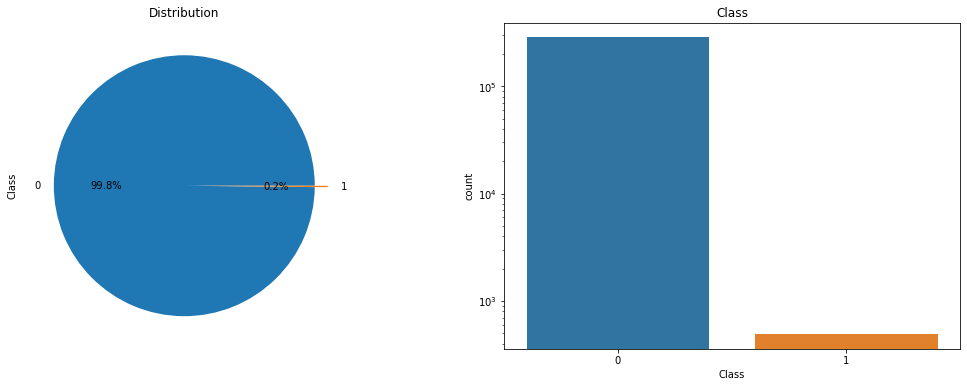

In [8]:
f,ax=plt.subplots(1,2, figsize=(18,6))
card_df['Class'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Distribution')

# Check the imbalance distribution in Class feature
ax = sns.countplot(x='Class', data=card_df);
ax.set_yscale('log')
plt.title('Class')


**Feature Selection**

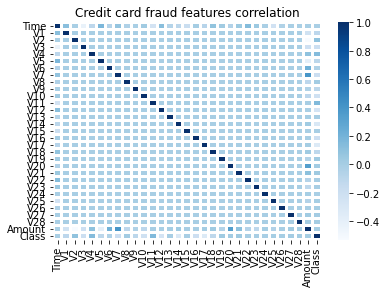

In [9]:
# Find the correlation between features and the target
feature_cor = card_df.corr()
feature_cor["Class"].sort_values(ascending = False)
plt.title("Credit card fraud features correlation")

# Correlation plot
sns.heatmap(
    feature_cor, xticklabels = feature_cor.columns, yticklabels = feature_cor.columns,
    linewidth=2, cmap="Blues", cbar=True)



Text(0.5, 1.0, 'Amount')

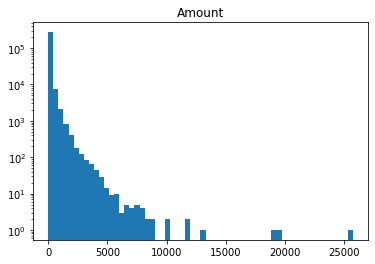

In [10]:
# We look into the 'Amount' feature before standardizing
ax = card_df.Amount.hist(grid=False, bins=60) # bins: amounts of bars
ax.set_yscale('log')
plt.title('Amount')


Text(0.5, 1.0, 'Time')

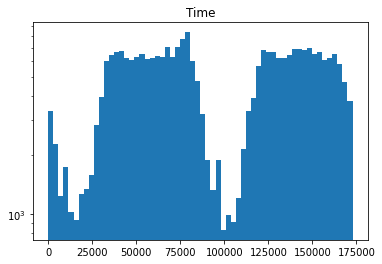

In [11]:
# We look into the 'Time' feature before standardizing
ax = card_df.Time.hist(grid=False, bins=60)
ax.set_yscale('log')
plt.title('Time')


Text(0.5, 1.0, 'Time')

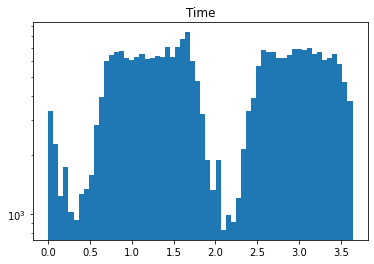

In [12]:
# Examine the weights of selected features 'Amount' and 'Time', after standardizing
# We use the Z-score method. Formula: z = (x-µ)/ σ
card_df.Time = (card_df.Time - card_df.Time.min())/ card_df.Time.std() # use min() avoid negative on axis values
card_df.Amount = (card_df.Amount - card_df.Amount.mean())/ card_df.Amount.std()

ax = card_df.Time.hist(grid=False, bins=60)
ax.set_yscale('log')
plt.title('Time')


Text(0.5, 1.0, 'Amount')

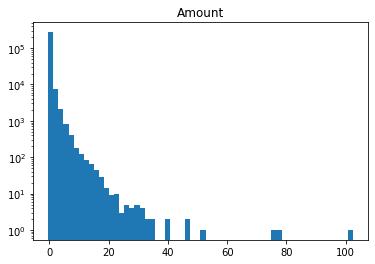

In [13]:
ax = card_df.Amount.hist(grid=False, bins=60)
ax.set_yscale('log')
plt.title('Amount')


**Data Manipulation**

In [14]:
# Train test split the data into 70% training data, and 30% testing data
data = card_df.drop('Class', axis=1).values
target = card_df.Class.values

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3) # random sampling

# Data scaling
Scaler = StandardScaler()

X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)


In [15]:
# Naive Bayesian NB classifier
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Accuracy: ', round(acc, 4))
print('Confusion matrix: \n', cm)

tn, fp, fn, tp = cm.ravel()
tpr = round(tp/(tp+fn), 4)
tnr = round(tn/(tn+fp), 4)

print('Naive Bayesian Summary: TP = %d, FP = %d, TN = %d, FN = %d, Acc = %.4f, TPR = %.4f, TNR = %.4f'
    %(tp, fp, tn, fn, round(acc, 4), tpr, tnr))



Accuracy:  0.9777
Confusion matrix: 
 [[83402  1884]
 [   23   134]]
Naive Bayesian Summary: TP = 134, FP = 1884, TN = 83402, FN = 23, Acc = 0.9777, TPR = 0.8535, TNR = 0.9779


In [16]:
# Logistic Regression classifier
log = LogisticRegression(random_state=0)
log = log.fit(X_train, y_train)

y_pred = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('\nLogistic Regression: \n')
print('Accuracy is: ', round(acc, 4))
print('\nConfusion matrix is: \n', cm)

# cm
tn, fp, fn, tp = cm.ravel()
tpr = round(tp/(tp+fn), 4)
tnr = round(tn/(tn+fp), 4)

print('\nSummary of Logistic Regression: tp: %d, fp: %d, tn: %d, fn: %d, acc: %.4f, tpr: %.4f, tnr: %.4f'
      %(tp,fp, tn, fn, round(acc, 4), tpr, tnr))




Logistic Regression: 

Accuracy is:  0.9992

Confusion matrix is: 
 [[85276    10]
 [   57   100]]

Summary of Logistic Regression: tp: 100, fp: 10, tn: 85276, fn: 57, acc: 0.9992, tpr: 0.6369, tnr: 0.9999


In [17]:
# Decision Tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree = tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Accuracy: ', round(acc, 4))
print('Confusion matrix: \n', cm)

tn, fp, fn, tp = cm.ravel()
tpr = round(tp/(tp+fn), 4)
tnr = round(tn/(tn+fp), 4)

print('Decision Tree Summary: TP = %d, FP = %d, TN = %d, FN = %d, Acc = %.4f, TPR = %.4f, TNR = %.4f'
    %(tp, fp, tn, fn, round(acc, 4), tpr, tnr))



Accuracy:  0.9991
Confusion matrix: 
 [[85240    46]
 [   33   124]]
Decision Tree Summary: TP = 124, FP = 46, TN = 85240, FN = 33, Acc = 0.9991, TPR = 0.7898, TNR = 0.9995


model 1 AUC score: 0.8887833888185555


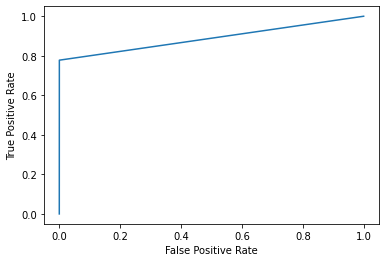

In [30]:
# Draw a ROC Curve to examine how well the model seperate the classes
def plot_roc_curve(y_test, y_pred):

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_pred)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred)}')

According to the results above, we got the highest accuracy in both Decision Tree and Logistic Regression classifier. 

However, accuracy score can't reflect the comprehensiveness of models, due to imbalance dataset.

Next step, we will use ensemble learning to examine the imbalance dataset with recall rate and F1 score.

**Ensemble Learning**

Method: Voting Ensemble

Note that: In Decision Tree classifier, for avoiding overfitting the model, we set up the maximum depth = 5.


In [18]:
# Train test split into 70% and 30%
fit_data_2 = card_df.drop('Class', axis=1).values
target_2 = card_df.Class.values


X_train, X_test, y_train, y_test = train_test_split(fit_data_2, target_2, test_size=0.3)

# Train the base learners
bc_lrs = [('Gaussian NB', GaussianNB()), ('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier(max_depth=5))]

for x in bc_lrs:
  lr = x[1]
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  # Get the initial scores
  print(x[0] + ' f1:', round(f1_score(y_test, y_pred),4))
  print(x[0]+ ' recall:', round(recall_score(y_test, y_pred),4))
  print(confusion_matrix(y_test, y_pred))



Gaussian NB f1: 0.1048
Gaussian NB recall: 0.8296
[[83417  1891]
 [   23   112]]
Logistic Regression f1: 0.7273
Logistic Regression recall: 0.6222
[[85296    12]
 [   51    84]]
Decision Tree f1: 0.814
Decision Tree recall: 0.7778
[[85290    18]
 [   30   105]]


Text(0.5, 1.0, 'Class correlations')

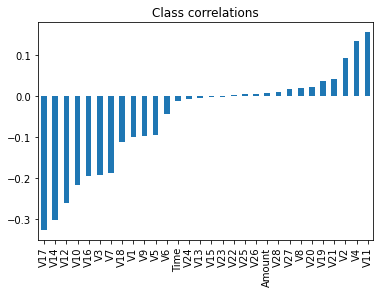

In [19]:
# Feature selection
feature_cor_2 = card_df.corr()['Class'].drop('Class')
feature_cor_2.sort_values().plot(kind = 'bar')

plt.title('Class correlations')


In [20]:
# Now we can drop the feature which are lower than 0.1
pattern = 0.1

cor = card_df.corr()['Class'].drop('Class')

# Store the features
selected_features = list(cor[(abs(cor) > pattern)].index.values)
selected_features.append('Class')

n_card_df = card_df[selected_features]

# Test our model with optimized dataframe to see the difference
fit_data_3 = n_card_df.drop('Class', axis=1).values
target_3 = n_card_df.Class.values

# Filtered train test split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(fit_data_3, target_3, test_size=0.3)


for x in bc_lrs:
  lr = x[1]
  lr.fit(X_train_f, y_train_f)

  y_pred_f = lr.predict(X_test_f)

  # Get the initial scores
  print(x[0] + ' f1:', round(f1_score(y_test_f, y_pred_f),4))
  print(x[0]+ ' recall:', round(recall_score(y_test_f, y_pred_f),4))
  print(confusion_matrix(y_test_f, y_pred_f))



Gaussian NB f1: 0.2037
Gaussian NB recall: 0.8767
[[84314   983]
 [   18   128]]
Logistic Regression f1: 0.7634
Logistic Regression recall: 0.6849
[[85281    16]
 [   46   100]]
Decision Tree f1: 0.8298
Decision Tree recall: 0.8014
[[85278    19]
 [   29   117]]


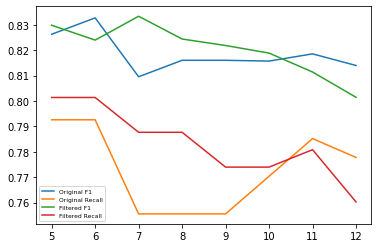

In [21]:
# Optimize the decision tree with depth
# Test the depth from 5 to 12 (depth too large may cause model overfitting)
f1_org = []
recall_org = []

dp_range = [i for i in range(5, 13)]

for p in dp_range:
  lr = DecisionTreeClassifier(max_depth=p)
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  f1_org.append(f1_score(y_test, y_pred))
  recall_org.append(recall_score(y_test, y_pred))

# Plot the figure
plt.plot(dp_range, f1_org, label='Original F1')
plt.plot(dp_range, recall_org, label='Original Recall')


# Test with filtered model
f1_filter = []
recall_filter = []

dp_range = [i for i in range(5, 13)]

for p in dp_range:
  lr = DecisionTreeClassifier(max_depth=p)
  lr.fit(X_train_f, y_train_f)

  y_pred_f = lr.predict(X_test_f)

  f1_filter.append(f1_score(y_test_f, y_pred_f))
  recall_filter.append(recall_score(y_test_f, y_pred_f))

# Plot the figure
plt.plot(dp_range, f1_filter, label='Filtered F1')
plt.plot(dp_range, recall_filter, label='Filtered Recall')
plt.legend(prop={'size': 6}, loc='lower left')
plt.show()



In [75]:
# Max f1 score and recall examination
print('Original F1: ', round(max(f1_org),4))
print('Original Recall: ', round(max(recall_org),4))
print('Filtered F1: ', round(max(f1_filter),4))
print('Filtered Recall: ', round(max(recall_filter),4))


Original F1:  0.8118
Original Recall:  0.7639
Filtered F1:  0.8328
Filtered Recall:  0.7888


In [24]:
# Ensembling models
# As the figure above, we observe that when max depth = 6, model has the highest f1 score
bc_lrs = [('Gaussian NB', GaussianNB()), ('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier(max_depth=6))]

ensemble = VotingClassifier(bc_lrs)
ensemble.fit(X_train, y_train)

print('Vothing ensemble f1: ', round(f1_score(y_test, y_pred),4))
print('Vothing ensemble recall: ', round(recall_score(y_test, y_pred),4))

# Filtered train test dataset
ensemble = VotingClassifier(bc_lrs)
ensemble.fit(X_train_f, y_train_f)

print('\nVothing ensemble filter f1: ', round(f1_score(y_test_f, y_pred_f),4))
print('Vothing ensemble filter recall: ', round(recall_score(y_test_f, y_pred_f),4))


Vothing ensemble f1:  0.814
Vothing ensemble recall:  0.7778

Vothing ensemble filter f1:  0.8014
Vothing ensemble filter recall:  0.7603


In [31]:
# Enhance the ensemble model
# depth = 5, 6, 7
bc_lrs_en = [('Gaussian NB', GaussianNB()), ('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier(max_depth=6)), 
             ('Decision Tree x1', DecisionTreeClassifier(max_depth=5)), ('Decision Tree x2', DecisionTreeClassifier(max_depth=7))]

ensemble = VotingClassifier(bc_lrs_en)
ensemble.fit(X_train, y_train)

print('Vothing ensemble f1: ', round(f1_score(y_test, y_pred),4))
print('Vothing ensemble recall: ', round(recall_score(y_test, y_pred),4))

# Filtered train test dataset
ensemble = VotingClassifier(bc_lrs)
ensemble.fit(X_train_f, y_train_f)

print('\nVothing ensemble filter f1: ', round(f1_score(y_test_f, y_pred_f),4))
print('Vothing ensemble filter recall: ', round(recall_score(y_test_f, y_pred_f),4))



Vothing ensemble f1:  0.814
Vothing ensemble recall:  0.7778

Vothing ensemble filter f1:  0.8014
Vothing ensemble filter recall:  0.7603


References: 

https://www.geeksforgeeks.org/ensemble-methods-in-python/


https://zh.wikipedia.org/zh-tw/%E9%9B%86%E6%88%90%E5%AD%A6%E4%B9%A0

https://www.kaggle.com/code/emineyetm/dealing-with-imbalanced-datasets

https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f